##**Wczytanie danych**

In [1]:
import pandas as pd

file_path = 'in_utf8.txt'

df = pd.read_csv(file_path, header=None, sep='\t')
df.columns = ['ML', 'EN', 'HUMAN', 'PREDICTION']

print(df)


                                                     ML  \
0           Zdjęcie satelitarne spoglądające na ziemię.   
1     Dlatego chcą zaistnieć jako potęga przemysłowa...   
2                      I umieściłem je na moim zdjęciu.   
3     I znowu możesz myśleć o tym jak o prawie mapow...   
4                               Więc co jest najlepsze.   
...                                                 ...   
1980  Nic nie idzie w górę ani w dół mojego rękawa, ...   
1981  A ludzie z tyłu są w porządku. Tak naprawdę te...   
1982                     Jest dużo coachingu szczęścia.   
1983             To było prawie poza progiem wyobraźni.   
1984                               A oto niespodzianka.   

                                                     EN  \
0        A satellite picture looking down at the earth.   
1     So they want to emerge as an industrial powerh...   
2                    And I put them into my photograph.   
3     And again you can think of this as almost mapp...

##**Podobieństwo Spacy**

In [ ]:
import spacy
!python -m spacy download pl_core_news_lg

nlp = spacy.load("pl_core_news_lg")

In [3]:
similarity = []
for index, row in df.iterrows():
    ml_nlp = nlp(row["ML"])
    human_nlp = nlp(row["HUMAN"])
    similarity.append(ml_nlp.similarity(human_nlp))


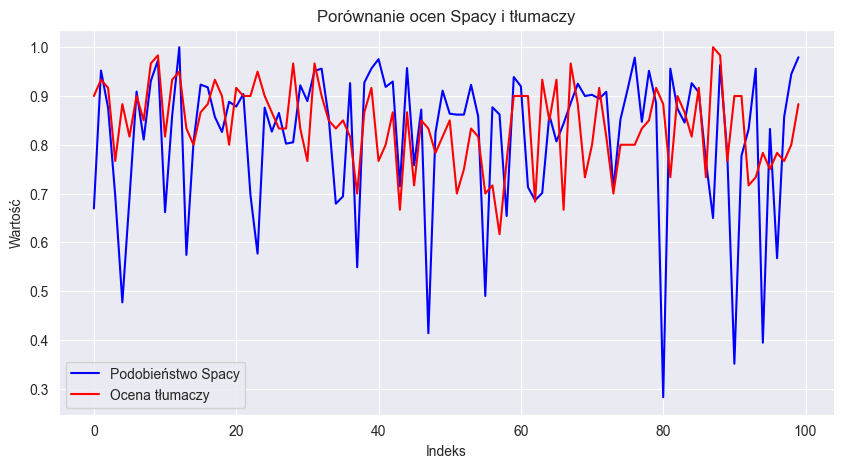

In [4]:
import numpy as np
import matplotlib.pyplot as plt

similarity_spacy = similarity[:100]  # Dane są wzięte pierwsze 100, żeby było czytelnie
human_translation = df['PREDICTION'].tolist()[:100]
human_translation = [x / 5 for x in human_translation]

plt.figure(figsize=(10, 5))

plt.plot(similarity_spacy, label='Podobieństwo Spacy', color='blue')
plt.plot(human_translation, label='Ocena tłumaczy', color='red')

plt.legend()
plt.title('Porównanie ocen Spacy i tłumaczy')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.grid(True)
plt.show()


Współczynnik korelacji: 0.13665225743322731
Odległość euklidesowa: 1.6033141236504047


C:\Users\jansi\AppData\Local\Temp\ipykernel_29476\893018845.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


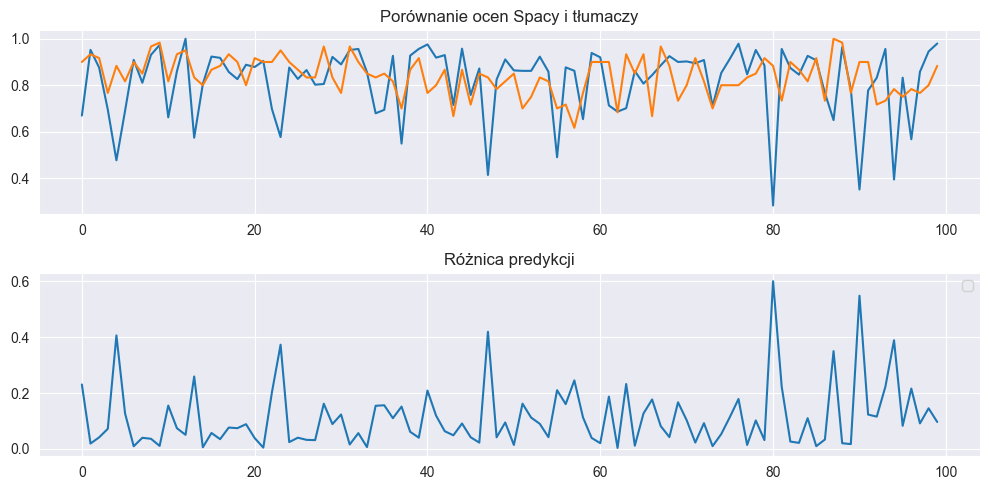

In [5]:
correlation = np.corrcoef(similarity_spacy, human_translation)[0, 1]
euclidean_distance = np.linalg.norm([xi - yi for xi, yi in zip(similarity_spacy, human_translation)])

print("Współczynnik korelacji:", correlation)
print("Odległość euklidesowa:", euclidean_distance)

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(similarity_spacy)
plt.plot(human_translation)
plt.title('Porównanie ocen Spacy i tłumaczy')

plt.subplot(2, 1, 2)
plt.plot(np.abs([xi - yi for xi, yi in zip(similarity_spacy, human_translation)]))
plt.title('Różnica predykcji')

plt.legend()
plt.tight_layout()
plt.show()

##**Chat GPT**

In [6]:
file_path = 'ChatGPT.txt'

df = pd.read_csv(file_path, header=None, sep='\t')
df.columns = ['AI', 'ENG', 'HUMAN']

print(df)

                                                   AI  \
0       Zdjęcie satelitarne patrzące w dół na Ziemię.   
1   Chcą stać się potęgą przemysłową w branżach ni...   
2                      Umieściłem ich w moim zdjęciu.   
3   I znów możesz to potraktować jak mapowanie nas...   
4                             Więc co jest najlepsze.   
..                                                ...   
95  Chcieli integracji zespołu — żeby to maszyna w...   
96  I wyzwał mnie, bym rozgryzł pokój z iluzją opt...   
97  Dwa miesiące później — i to jest już udokument...   
98             Powiedziałem: Nie — użyj metody babci.   
99  Myślę, że naszym wrogiem była fizyka — a ona j...   

                                                  ENG  \
0      A satellite picture looking down at the earth.   
1   So they want to emerge as an industrial powerh...   
2                  And I put them into my photograph.   
3   And again you can think of this as almost mapp...   
4                             

In [7]:
similarity = []
for index, row in df.iterrows():
    ml_nlp = nlp(row["AI"])
    human_nlp = nlp(row["HUMAN"])
    similarity.append(ml_nlp.similarity(human_nlp))

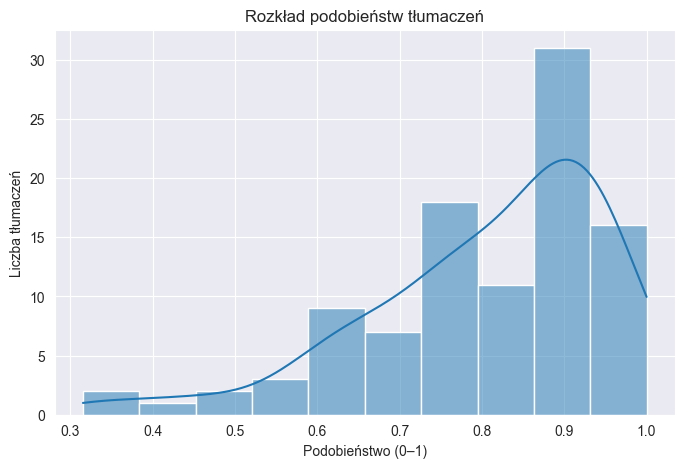

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Similarity"] = similarity
plt.figure(figsize=(8, 5))
sns.histplot(df["Similarity"], bins=10, kde=True)
plt.title("Rozkład podobieństw tłumaczeń")
plt.xlabel("Podobieństwo (0–1)")
plt.ylabel("Liczba tłumaczeń")
plt.show()


In [9]:
average_similarity = df["Similarity"].mean()
print(f"Średnie podobieństwo: {average_similarity:.4f}")

median_similarity = df["Similarity"].median()
print(f"Mediana podobieństwa: {median_similarity:.4f}")

std_similarity = df["Similarity"].std()
print(f"Odchylenie standardowe: {std_similarity:.4f}")

Średnie podobieństwo: 0.8065
Mediana podobieństwa: 0.8545
Odchylenie standardowe: 0.1458


##**Grok**

In [10]:
file_path = 'Grok.txt'

df = pd.read_csv(file_path, header=None, sep='\t')
df.columns = ['AI', 'ENG', 'HUMAN']

print(df)

                                                   AI  \
0   Zdjęcie satelitarne przedstawiające Ziemię z g...   
1   Chcą więc wyrosnąć na przemysłową potęgę w róż...   
2                     I umieściłem je w moim zdjęciu.   
3   I znowu, można to porównać do mapowania naszyc...   
4                             Więc co jest najlepsze.   
..                                                ...   
95  Chcieli integracji zespołu, to maszyna działa ...   
96  I zmusił mnie do wyzwania, by rozgryźć pokój z...   
97  Dwa miesiące później, co jest teraz udokumento...   
98            Powiedziałem: „Nie, użyj metody babci”.   
99  Myślę, że naszym wrogiem była fizyka, a ona je...   

                                                  ENG  \
0      A satellite picture looking down at the earth.   
1   So they want to emerge as an industrial powerh...   
2                  And I put them into my photograph.   
3   And again you can think of this as almost mapp...   
4                             

In [11]:
similarity = []
for index, row in df.iterrows():
    ml_nlp = nlp(row["AI"])
    human_nlp = nlp(row["HUMAN"])
    similarity.append(ml_nlp.similarity(human_nlp))

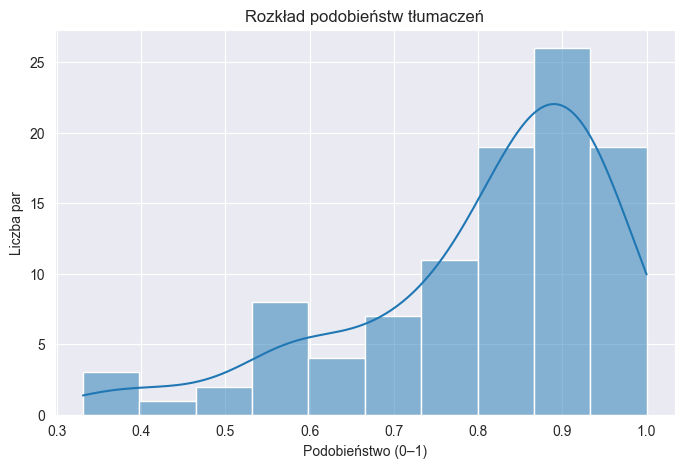

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Similarity"] = similarity
plt.figure(figsize=(8, 5))
sns.histplot(df["Similarity"], bins=10, kde=True)
plt.title("Rozkład podobieństw tłumaczeń")
plt.xlabel("Podobieństwo (0–1)")
plt.ylabel("Liczba par")
plt.show()


In [13]:
average_similarity = df["Similarity"].mean()
print(f"Średnie podobieństwo: {average_similarity:.4f}")

median_similarity = df["Similarity"].median()
print(f"Mediana podobieństwa: {median_similarity:.4f}")

std_similarity = df["Similarity"].std()
print(f"Odchylenie standardowe: {std_similarity:.4f}")

Średnie podobieństwo: 0.8060
Mediana podobieństwa: 0.8550
Odchylenie standardowe: 0.1540


##**Gemini**

In [14]:
file_path = 'Gemini.txt'

df = pd.read_csv(file_path, header=None, sep='\t')
df.columns = ['AI', 'ENG', 'HUMAN']

print(df)

                                                   AI  \
0           Obraz satelitarny Ziemi widzianej z góry.   
1   Więc chcą stać się potęgą przemysłową we wszys...   
2                    I umieściłem je na moim zdjęciu.   
3   I znowu, możesz to traktować niemal jak mapowa...   
4                             Więc co jest najlepsze.   
..                                                ...   
95  Chcieli integracji zespołu, czyli maszyna dzia...   
96  I postawił mi wyzwanie, żeby wymyślić pokój z ...   
97  Dwa miesiące później, a jest to już udokumento...   
98            Powiedziałem: „Nie, użyj metody babci”.   
99  Myślę, że naszym wrogiem była fizyka, a ona je...   

                                                  ENG  \
0      A satellite picture looking down at the earth.   
1   So they want to emerge as an industrial powerh...   
2                  And I put them into my photograph.   
3   And again you can think of this as almost mapp...   
4                             

In [15]:
similarity = []
for index, row in df.iterrows():
    ml_nlp = nlp(row["AI"])
    human_nlp = nlp(row["HUMAN"])
    similarity.append(ml_nlp.similarity(human_nlp))

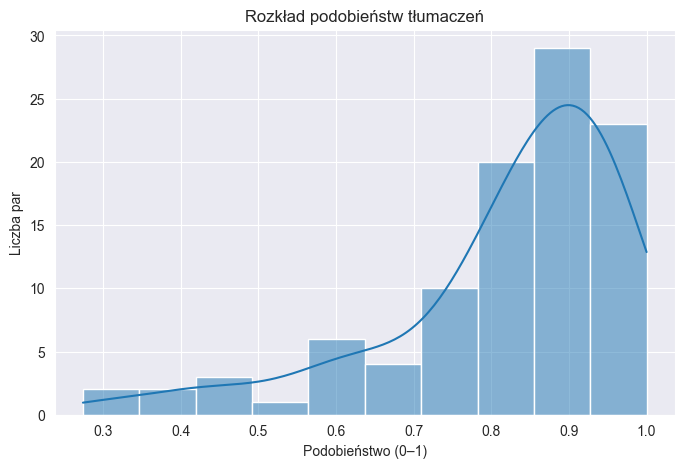

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Similarity"] = similarity
plt.figure(figsize=(8, 5))
sns.histplot(df["Similarity"], bins=10, kde=True)
plt.title("Rozkład podobieństw tłumaczeń")
plt.xlabel("Podobieństwo (0–1)")
plt.ylabel("Liczba par")
plt.show()


In [17]:
average_similarity = df["Similarity"].mean()
print(f"Średnie podobieństwo: {average_similarity:.4f}")

median_similarity = df["Similarity"].median()
print(f"Mediana podobieństwa: {median_similarity:.4f}")

std_similarity = df["Similarity"].std()
print(f"Odchylenie standardowe: {std_similarity:.4f}")

Średnie podobieństwo: 0.8202
Mediana podobieństwa: 0.8647
Odchylenie standardowe: 0.1572
